# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df.drop(columns=['Id'], inplace=True)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [5]:
# your code here
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})


In [6]:
missing_value_df.sort_values('percent_missing', ascending=False)[:20]

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [7]:
# your code here
drop_cols = list(missing_value_df[missing_value_df['percent_missing'] > 20].index)
drop_cols


['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [8]:
df.drop(columns=drop_cols, inplace=True)

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

<AxesSubplot:ylabel='Frequency'>

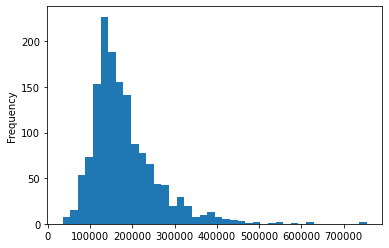

In [10]:
# your code here
df['SalePrice'].plot.hist(bins=40)


In [11]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
df['SalePrice'].agg(['skew', 'kurtosis']).transpose()

skew        1.882876
kurtosis    6.536282
Name: SalePrice, dtype: float64

In [13]:
# your comment here
'''
The Sale price resambles normal distribution but it is right skewed as it has long tail on the right side (and the mean can be found right mrom mode- the highest bar on the histogram). 
Since the skew parameter is higher than 1 I can assume that this data is highly skewed.
'''

'\nThe Sale price resambles normal distribution but it is right skewed as it has long tail on the right side (and the mean can be found right mrom mode- the highest bar on the histogram). \nSince the skew parameter is higher than 1 I can assume that this data is highly skewed.\n'

## Challenge 2 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [14]:
sale=df['SalePrice']

In [15]:
# your code here
# I am strting by imorting libraries
import scipy.stats as stats
import pylab


def normality(data,feature):
	#This is a function which will compare the normal distribution after transformations
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()


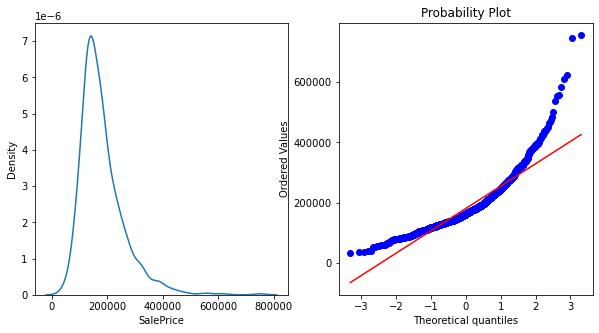

In [16]:
#I will graph again the data for SalePrice
normality(df,'SalePrice')

#### Logarithmic transformation

In [17]:
#Now I will do log transformation
#performing logarithmic transformation on the feature
df['price_log']=np.log(df['SalePrice'])

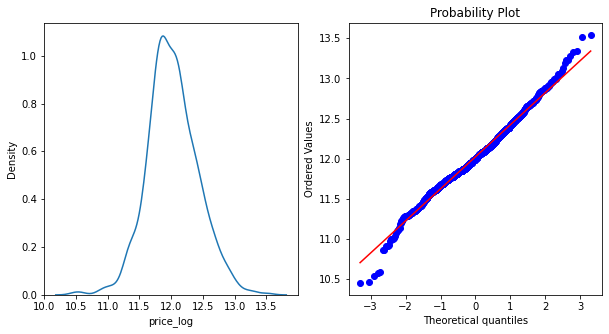

In [18]:
#plotting to check the transformation
normality(df,'price_log')

In [19]:
df['price_log'].skew()

0.12133506220520406

In [20]:
'''After logaritmic transformation data fits really well normal distribution. Skew parameter is much lower'''

'After logaritmic transformation data fits really well normal distribution. Skew parameter is much lower'

#### Reciprocal Transformation – This will inverse values of Price i.e1/Price

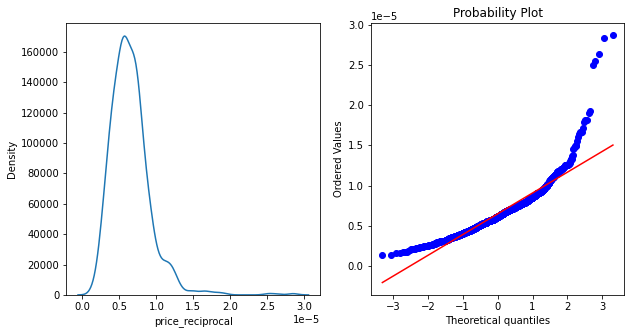

2.142121472065559

In [21]:
df['price_reciprocal']=1/df.SalePrice
normality(df,'price_reciprocal')
df['price_reciprocal'].skew()

In [22]:
'''
This was not good tranformation as skewed parameter increased
'''

'\nThis was not good tranformation as skewed parameter increased\n'

#### Square Root Transformation – This transformation will take the square root of the Price column i.e sqrt(Price).

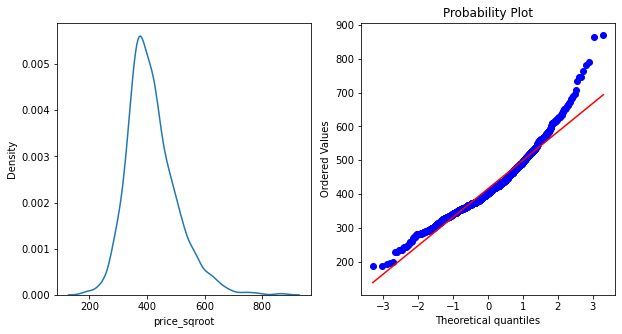

0.9431527373310963

In [23]:
df['price_sqroot']=np.sqrt(df.SalePrice)
normality(df,'price_sqroot')
df['price_sqroot'].skew()

In [24]:
'''
This transformation lowered skew parameter but it is still around 1, which is high
'''

'\nThis transformation lowered skew parameter but it is still around 1, which is high\n'

#### Exponential Transformation: The exponential value of the Price variable will be taken.

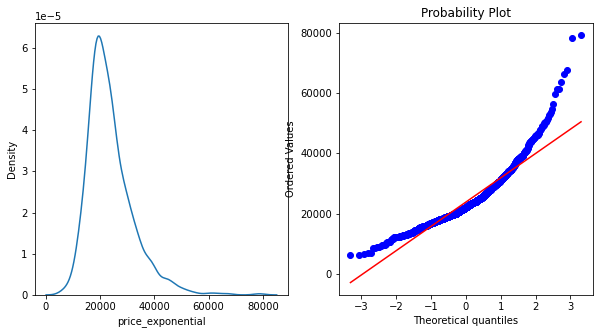

1.543250090390253

In [25]:
df['price_exponential']=df.SalePrice**(1/1.2)
normality(df,'price_exponential')
df['price_exponential'].skew()

In [26]:
'''
This transformation lowered skew parameter but it is still above 1, which is high
'''

'\nThis transformation lowered skew parameter but it is still above 1, which is high\n'

#### Box-Cox Transformation 

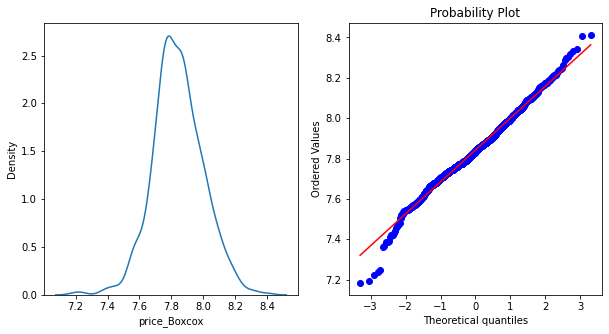

-0.008652893640830044

In [27]:
df['price_Boxcox'],parameters=stats.boxcox(df['SalePrice'])
normality(df,'price_Boxcox')
df['price_Boxcox'].skew()

In [28]:
'''
Boox-cox transformation resulted with the best transformation into normal distribution.
'''

'\nBoox-cox transformation resulted with the best transformation into normal distribution.\n'

## Challenge 3 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

#### Size of the house

In [29]:
# your code here
df[['GrLivArea','LotArea','GarageArea']].head()

,GrLivArea,LotArea,GarageArea
0,1710,8450,548
1,1262,9600,460
2,1786,11250,608
3,1717,9550,642
4,2198,14260,836


In [30]:
#I will create the column which will sum all of these parameters 
df['area']=df['GrLivArea'] + df['LotArea'] + df['GarageArea']

In [31]:
#Correlation with salePrice
df['SalePrice'].corr(df['area'])

0.3084382175281739

In [32]:
#Correlation with price_boxcox
df['price_Boxcox'].corr(df['area'])

0.300105907687507

In [33]:
'''
Since the above values are almost the same from now on I will compare diffrenct parameters with SalePrice instead of price_Boxcox'''

'\nSince the above values are almost the same from now on I will compare diffrenct parameters with SalePrice instead of price_Boxcox'

In [34]:
df[['GrLivArea','LotArea','GarageArea','SalePrice']].corr()

,GrLivArea,LotArea,GarageArea,SalePrice
GrLivArea,1.000000,0.263116,0.468997,0.708624
LotArea,0.263116,1.000000,0.180403,0.263843
GarageArea,0.468997,0.180403,1.000000,0.623431
SalePrice,0.708624,0.263843,0.623431,1.000000


<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>

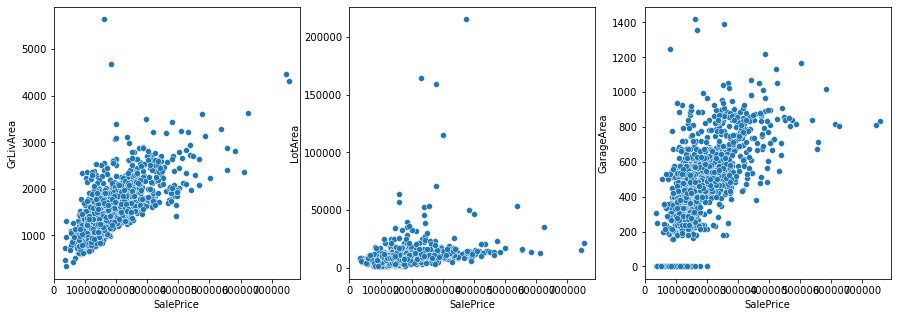

<Figure size 720x720 with 0 Axes>

In [35]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(15, 5))
plt.figure(figsize=(10,10))
    
sns.scatterplot(x=df.SalePrice, y=df.GrLivArea, ax=ax1)
sns.scatterplot(x=df.SalePrice, y=df.LotArea, ax=ax2)
sns.scatterplot(x=df.SalePrice, y=df.GarageArea, ax=ax3)


On the charts above and in the Table with correlation I can see that the price is mostly correlated to GrLivArea. There is also a correlation between price and Garage area (not strong).

#### Number of rooms

In [36]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [37]:
#I create new column which will add all of the rooms
df['no_rooms']=df['BedroomAbvGr']+df['KitchenAbvGr']+df['FullBath']+df['HalfBath']+df['BsmtFullBath']+df['BsmtHalfBath']

In [38]:
#There is a weak correlation between saleprice and total number of rooms
df['SalePrice'].corr(df['no_rooms'])

0.47070228000137726

In [39]:
#I want to check if there is one specific type of room that affects price the most so I create a correlation matrix
corr = df[['BedroomAbvGr','KitchenAbvGr','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','SalePrice']].corr()
corr

,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,SalePrice
BedroomAbvGr,1.000000,0.198597,0.363252,0.226651,-0.150673,0.046519,0.168213
KitchenAbvGr,0.198597,1.000000,0.133115,-0.068263,-0.041503,-0.037944,-0.135907
FullBath,0.363252,0.133115,1.000000,0.136381,-0.064512,-0.054536,0.560664
HalfBath,0.226651,-0.068263,0.136381,1.000000,-0.030905,-0.012340,0.284108
BsmtFullBath,-0.150673,-0.041503,-0.064512,-0.030905,1.000000,-0.147871,0.227122
BsmtHalfBath,0.046519,-0.037944,-0.054536,-0.012340,-0.147871,1.000000,-0.016844
SalePrice,0.168213,-0.135907,0.560664,0.284108,0.227122,-0.016844,1.000000


<AxesSubplot:>

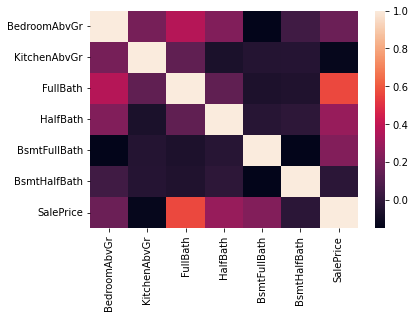

In [40]:
#and heatmap of that correlation
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:xlabel='no_rooms', ylabel='SalePrice'>

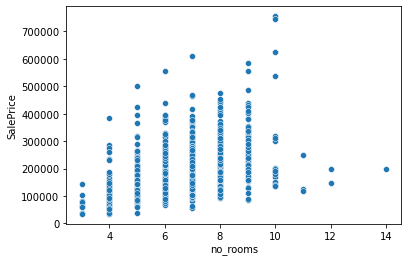

In [41]:
sns.scatterplot(x=df.no_rooms,y=df.SalePrice)

The highest influence on the price might have number of full bathrooms as there is the strongest positive correlation between sales price and number of full bathrooms

#### Year built and year remodeled

In [42]:
#I create 2 new columns to see how old are houses and how long ago they were remodeled
df['age_built']= 2021 -df['YearBuilt']
df['age_remodel']= 2021 -df['YearRemodAdd']

In [43]:
#Now I create correlation matrix
corr = df[['SalePrice','age_built','age_remodel']].corr()
corr

,SalePrice,age_built,age_remodel
SalePrice,1.000000,-0.522897,-0.507101
age_built,-0.522897,1.000000,0.592855
age_remodel,-0.507101,0.592855,1.000000


<AxesSubplot:>

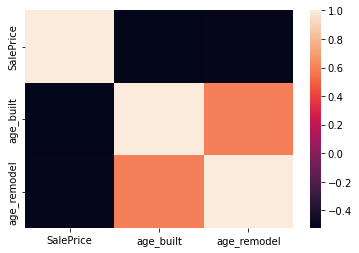

In [44]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:xlabel='age_built', ylabel='SalePrice'>

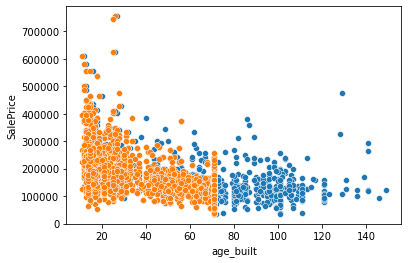

In [45]:
#From the correlation matrix I see that there are negative relationships between age of house, age of remodeling and sales price, which is logic as the older the house the lower the price. 
sns.scatterplot(x=df.age_built,y=df.SalePrice)
sns.scatterplot(x=df.age_remodel,y=df.SalePrice)

In [46]:
'''
The scatter plot above shows that there is a relationship between price of the house and its age.'''

'\nThe scatter plot above shows that there is a relationship between price of the house and its age.'

#### Neigbourhood

In [47]:
#First I group neighbourhoods and I calculate average price for it
neigbour = df.groupby('Neighborhood')['SalePrice'].agg(['mean'])
neigbour.sort_values(['mean'], inplace=True)

<AxesSubplot:xlabel='Neighborhood'>

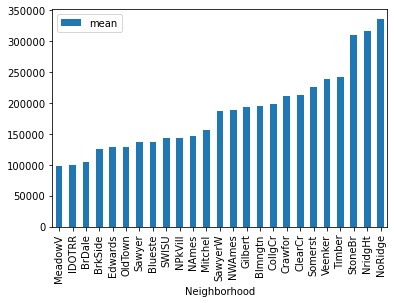

In [48]:
neigbour.plot.bar()

It can be seen from the graph above that the price depends on the neighbourhood. There is almost a linear realationship between these two variables. 

## Challenge 4 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

<AxesSubplot:>

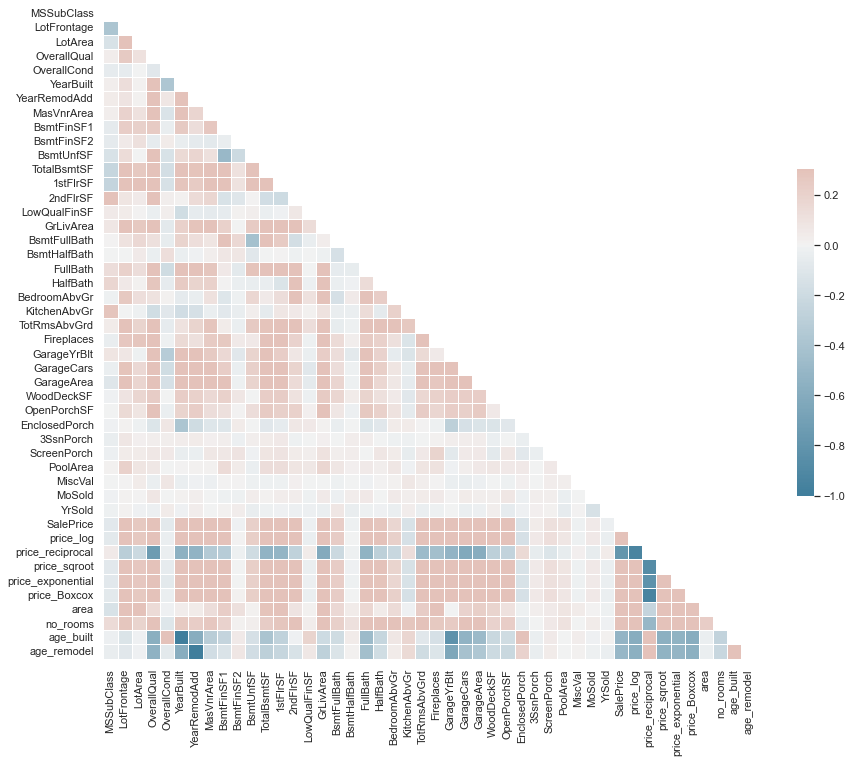

In [53]:
# your code here
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [54]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [50]:
# your comment here
'''
The positiviely correlated variables to the SaelPrice are:
LotFrontage, LotArea, OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath,BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageType, GarageType, GarageArea, WoodDeckSF, OpenPorchSF. 

There is also strong negative correlation with age built and age remodeled. 
'''

## Challenge 5 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

#### 1. Age of the building 

In [51]:
'''
The price of the house is dependent on the age of the building and/or the years from its last renovation. It is connected with a lot of factors but naturaly the materials etc. are used after time buildings need renovation to be for exampel more energy efficient etc. Therefore, it is understandable that the newer/younger the building the higher the price.  
'''

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_built', ylabel='SalePrice'>

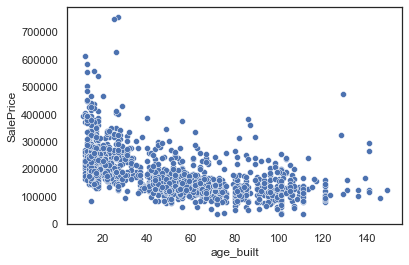

In [57]:
sns.scatterplot(df.age_built, df.SalePrice)

#### 2. Neigbourhood

In [ ]:
'''
The price of the house is also dependent on the neigbourhood. The place where the house is located influences the price as there is a lot of factors which have influence on the quality of life and the neigbourhood for example: vicinity of prcs, schools, shops, communication with the city center or other cities etc. Therefore, the houses in more prestigous/nice neigbpourhoods cost more as illustrated on the graph below: 
'''

<AxesSubplot:xlabel='Neighborhood'>

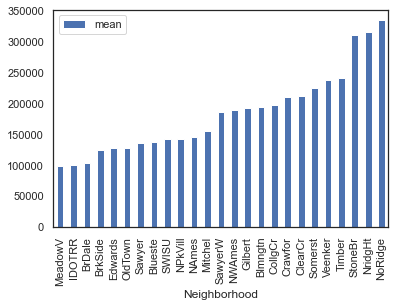

In [58]:
neigbour.plot.bar()

#### 3. Number of full bathrooms 

In [ ]:
'''
The house price increases with the number of full bathrooms. It maight be explaine dby the fact the the more the house have full bathrooms, probably it has also more rooms, more space more area. Therefore these 2 variables are concencted as shown on the graph below. 
'''

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

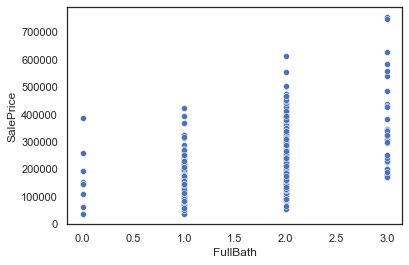

In [59]:
sns.scatterplot(df.FullBath, df.SalePrice)

#### 4. Overal Quality

In [ ]:
'''
The price of the house is of course depended on its overall quality as it affects the quality fo living in the house.
'''

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

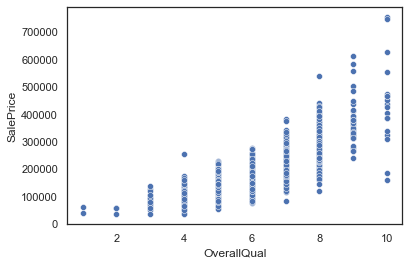

In [60]:
sns.scatterplot(df.OverallQual, df.SalePrice)

#### 5. Garage Area 

In [ ]:
'''
The price of the house is also dependent on the garage area, as garage is an important part of the house. We could assume that the bigger the garage the bigger the house, as it is capable to contain more cars. Therefore the price of the house increases with the area of the garage.
'''

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

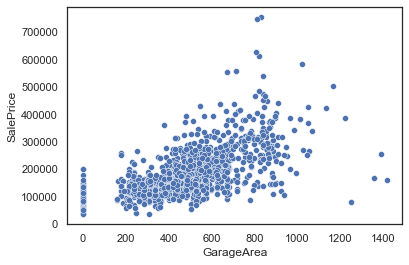

In [63]:
sns.scatterplot(df.GarageArea, df.SalePrice)